### EDA

DATASET: https://grouplens.org/datasets/movielens/


In [1]:
#Libraries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
#upload the dataset
movie = pd.read_csv('/Users/ssahin/Desktop/Movie_Recommendation/movie_lens_dataset/movie.csv')
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [3]:
rating = pd.read_csv('/Users/ssahin/Desktop/Movie_Recommendation/movie_lens_dataset/rating.csv')
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [4]:
rating['rating'].max()

5.0

In [5]:
rating['rating'].min()

0.5

In [22]:
# rating['average'] = rating.groupby('movieId')['rating'].transform('mean')
# rating

In [6]:
df = movie.merge(rating, how="left", on="movieId")
df.drop(columns=['timestamp','genres'], inplace=True)
df

,movieId,title,userId,rating
0,1,Toy Story (1995),3.0,4.0
1,1,Toy Story (1995),6.0,5.0
2,1,Toy Story (1995),8.0,4.0
3,1,Toy Story (1995),10.0,4.0
4,1,Toy Story (1995),11.0,4.5
...,...,...,...,...
20000792,131254,Kein Bund für's Leben (2007),79570.0,4.0
20000793,131256,"Feuer, Eis & Dosenbier (2002)",79570.0,4.0
20000794,131258,The Pirates (2014),28906.0,2.5
20000795,131260,Rentun Ruusu (2001),65409.0,3.0


In [7]:
print('Unique movie amount: ',df['title'].nunique())

Unique movie amount:  27262


In [8]:
df.isna().sum()

movieId      0
title        0
userId     534
rating     534
dtype: int64

### Rating Count of the Movies

In [9]:
rating_count = pd.DataFrame(df["title"].value_counts())
rating_count.reset_index(inplace=True)
rating_count.columns = ['title','ratingCount']
rating_count.head()

,title,ratingCount
0,Pulp Fiction (1994),67310
1,Forrest Gump (1994),66172
2,"Shawshank Redemption, The (1994)",63366
3,"Silence of the Lambs, The (1991)",63299
4,Jurassic Park (1993),59715


In [10]:
rating_count.tail()

,title,ratingCount
27257,Rapture (Arrebato) (1980),1
27258,"Education of Mohammad Hussein, The (2013)",1
27259,Satanas (2007),1
27260,Psychosis (2010),1
27261,Innocence (2014),1


<AxesSubplot:xlabel='Rating Count', ylabel='Amount of Movies'>

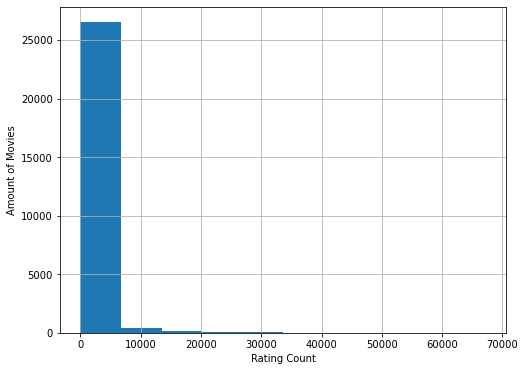

In [11]:
# Graph
plt.figure(figsize=(8,6))
plt.xlabel('Rating Count')
plt.ylabel('Amount of Movies')
rating_count['ratingCount'].hist(bins=10)

### Removing the movies which do not have rating

In [12]:
max_count = list(pd.DataFrame(df["title"].value_counts()).max())[0]
print(max_count)

67310


In [13]:
comment_counts = pd.DataFrame(df["title"].value_counts())
print(comment_counts)

                                           title
Pulp Fiction (1994)                        67310
Forrest Gump (1994)                        66172
Shawshank Redemption, The (1994)           63366
Silence of the Lambs, The (1991)           63299
Jurassic Park (1993)                       59715
...                                          ...
Rapture (Arrebato) (1980)                      1
Education of Mohammad Hussein, The (2013)      1
Satanas (2007)                                 1
Psychosis (2010)                               1
Innocence (2014)                               1

[27262 rows x 1 columns]


In [14]:
rare_movies = comment_counts[comment_counts["title"] <= max_count*0.01].index
common_movies = df[~df["title"].isin(rare_movies)]
print(common_movies)

          movieId                      title    userId  rating
0               1           Toy Story (1995)       3.0     4.0
1               1           Toy Story (1995)       6.0     5.0
2               1           Toy Story (1995)       8.0     4.0
3               1           Toy Story (1995)      10.0     4.0
4               1           Toy Story (1995)      11.0     4.5
...           ...                        ...       ...     ...
19992110   116797  The Imitation Game (2014)  138148.0     4.0
19992111   116797  The Imitation Game (2014)  138166.0     4.0
19992112   116797  The Imitation Game (2014)  138186.0     5.0
19992113   116797  The Imitation Game (2014)  138231.0     4.0
19992114   116797  The Imitation Game (2014)  138280.0     4.5

[18370734 rows x 4 columns]


In [15]:
print('Number of movies after removing 1% part : ',common_movies['title'].nunique())
print('The minimum number of reviews of the movies in the dataset: {} '.format(int(max_count*0.01)))

Number of movies after removing 1% part :  3893
The minimum number of reviews of the movies in the dataset: 673 


### Removing the movies in the 5% slice from the Dataset


In [17]:
max_count = list(pd.DataFrame(df["title"].value_counts()).max())[0]
comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= max_count*0.05].index
common_movies = df[~df["title"].isin(rare_movies)]
print('The number of films to be used when the 5% part is removed:: ',common_movies['title'].nunique())
print('The minimum number of reviews of the movies in the dataset: {} '.format(int(common_movies['title'].value_counts()[-1])))

The number of films to be used when the 5% part is removed::  1427
The minimum number of reviews of the movies in the dataset: 3366 


In [18]:
max_count = list(pd.DataFrame(df["title"].value_counts()).max())[0]
comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= max_count*0.10].index
common_movies = df[~df["title"].isin(rare_movies)]
print('The number of films to be used when the 10% part is removed:: ',common_movies['title'].nunique())
print('The minimum number of reviews of the movies in the dataset: {} '.format(int(common_movies['title'].value_counts()[-1])))

The number of films to be used when the 10% part is removed::  746
The minimum number of reviews of the movies in the dataset: 6751 


### Selecting the Movies to be Used for the Recommendation System

In [19]:
rating_count.iloc[0]

title          Pulp Fiction (1994)
ratingCount                  67310
Name: 0, dtype: object

In [20]:
rating_count.iloc[350]

title          Matrix Revolutions, The (2003)
ratingCount                             12282
Name: 350, dtype: object

In [21]:
rating_count.iloc[700]

title          Enemy at the Gates (2001)
ratingCount                         7185
Name: 700, dtype: object

In [22]:
rating_count.iloc[525]

title          Patriot Games (1992)
ratingCount                    8961
Name: 525, dtype: object

In [23]:
rating_count[rating_count['title'] == "Spy Game (2001)"]

,title,ratingCount
928,Spy Game (2001),5416


In [24]:
rating_count[rating_count['title'] == "Gladiator (2000)"]

,title,ratingCount
45,Gladiator (2000),32878


In [25]:
rating_count[rating_count['title'] == "Shawshank Redemption, The (1994)"]

,title,ratingCount
2,"Shawshank Redemption, The (1994)",63366


In [26]:
rating_count[rating_count['title'] == "We Were Soldiers (2002)"]

,title,ratingCount
1445,We Were Soldiers (2002),3314


In [27]:
rating_count[rating_count['title'] == "Behind Enemy Lines (2001)"]

,title,ratingCount
1592,Behind Enemy Lines (2001),2873


In [28]:
rating_count[rating_count['title'] == "Gangs of New York (2002)"]

,title,ratingCount
721,Gangs of New York (2002),7023
